# Selenium Overview

In [4]:
! pip install selenium

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [34]:
! pip install IPython.display

  Could not find a version that satisfies the requirement IPython.display (from versions: )
No matching distribution found for IPython.display
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [5]:
from bs4 import BeautifulSoup
from selenium import webdriver
from IPython.display import Image

import re

In [47]:
# 웹드라이브로 크롬브라우즈 띄운다.
driver_path = "driver/chromedriver.exe"
driver = webdriver.Chrome(executable_path=driver_path)

In [41]:
url_page = 'http://www.seleniumhq.org/projects/webdriver/'
driver.get(url_page)

In [45]:
driver.find_element_by_css_selector('#menu_download > a').click()

In [ ]:
# ! mkdir (폴더명)     <- 현위치에 폴더생성

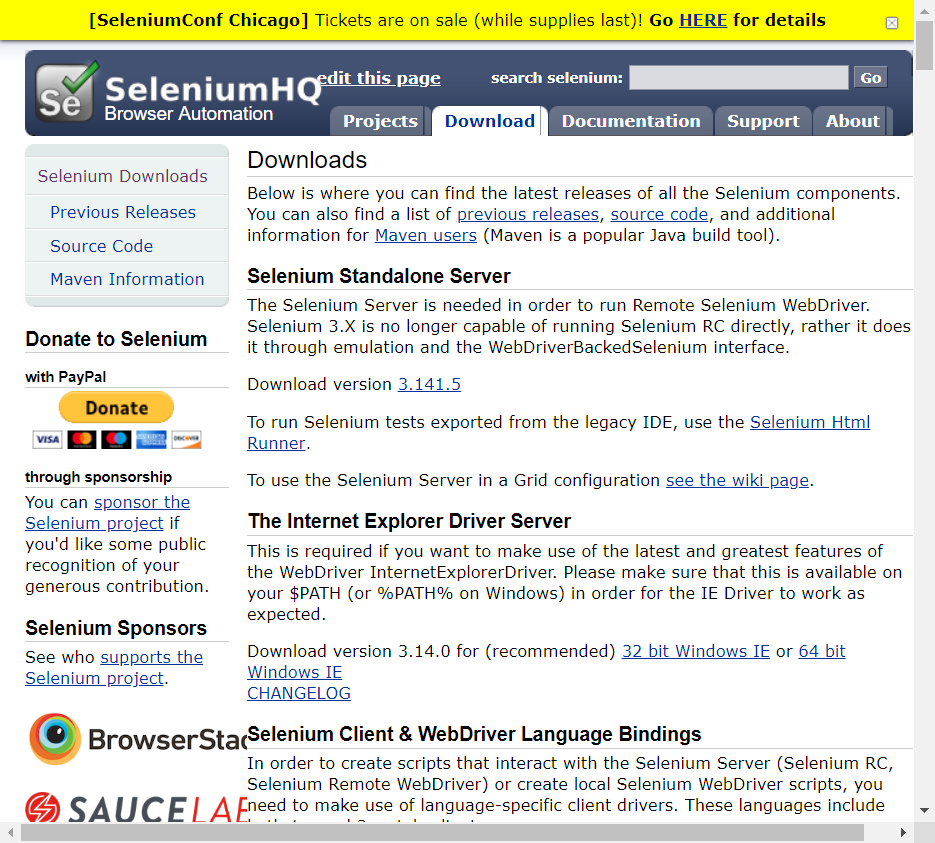

In [44]:
capture_img = './images/seleniumhq_download.png'
driver.save_screenshot(capture_img)
Image(capture_img)

#네이버크롤링

In [48]:
url_page = 'https://www.naver.com'
driver.get(url_page)

In [49]:
# XQury
driver.find_element_by_xpath('//*[@id="PM_ID_serviceNavi"]/li[6]/a').click()

# jQuery
# driver.find_element_by_css_selector('#PM_ID_serviceNavi > li:nth-child(6) > a').click()

In [50]:
# 평점&리뷰 1등 페이지로 이동
driver.find_element_by_css_selector('#review1 > div > a').click()

In [51]:
# 리뷰 클릭
driver.find_element_by_css_selector('#movieEndTabMenu > li:nth-child(6) > a').click()

In [52]:
# 현재 url 뽑는법
current_url = driver.current_url
current_url

'https://movie.naver.com/movie/bi/mi/review.nhn?code=167638'

#영화 안시성(163533) 리뷰페이지로 바로 이동

In [53]:
# 영화제목 검색키 입력
movie_title = '안시성'
driver.find_element_by_css_selector('#ipt_tx_srch').send_keys(movie_title)

In [54]:
# 검색 클릭
driver.find_element_by_css_selector('#jSearchArea > div > button').click()

In [55]:
# 검색 첫번째 페이지로 이동
driver.find_element_by_css_selector('#old_content > ul:nth-child(4) > li:nth-child(1) > dl > dt > a').click()

In [56]:
# 페이지 BeautifulSoup 객체로 가져온다
html = driver.page_source
soup = BeautifulSoup(html, "lxml")
soup.title

<title>안시성 : 네이버 영화</title>

In [57]:
current_url = driver.current_url
current_url

'https://movie.naver.com/movie/bi/mi/basic.nhn?code=163533'

In [58]:
pattern = re.compile("\d{6}")
result = pattern.findall(current_url)
code = result[0] if len(result)>0 else ''
code

'163533'

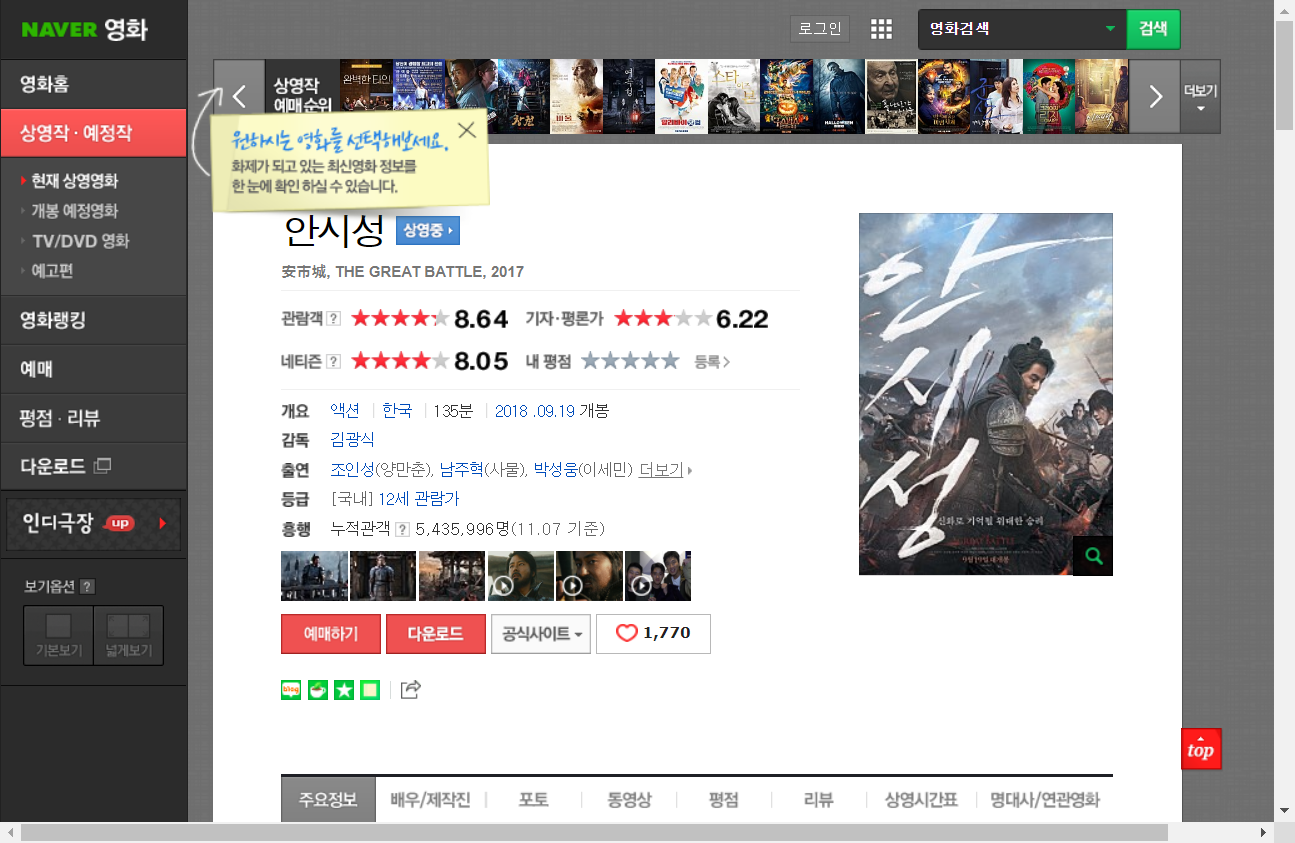

In [59]:
# 영화메인페이지 캡처후 저장
capture_img = './images/naver_movie_{code}.png'.format(code=code)
driver.save_screenshot(capture_img)
Image(capture_img)

In [60]:
# 리뷰페이지로 바로 이동
url_page = review_url.format(code)
driver.get(url_page)

NameError: name 'review_url' is not defined

In [61]:
html = driver.page_source
soup = BeautifulSoup(html, "lxml")

review_cnt = soup.find("span","cnt")
review_cnt

<span class="cnt">총<em>626</em>건</span>

In [62]:
review_cnt2 = review_cnt.find("em").get_text()
review_cnt2

'626'

In [63]:
review_cnt_total = int(review_cnt2.replace(',', ''))
review_cnt_total

626

In [64]:
last_page = review_cnt_total//10 + 1
last_page

63

In [65]:
'네이버영화 "안시성"의 리뷰수는 총 {}건이며, 마지막 페이지는 {} 입니다.'.format(review_cnt_total, last_page)

'네이버영화 "안시성"의 리뷰수는 총 626건이며, 마지막 페이지는 63 입니다.'

In [66]:
# 리뷰 마지막 페이지로 이동
url_page = 'https://movie.naver.com/movie/bi/mi/review.nhn?code={}&page={}'.format(code, last_page)
driver.get(url_page)